# This file is part of the first CA of CCT College Dublin student Illia Fadieiev

## 0. Preparing to work

### 0.1. Importing needed libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import DBSCAN
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, binom, poisson, norm, shapiro

### 0.2. Reading dataset

In [2]:
df = pd.read_csv("main_dataset.csv")

In [3]:
df

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
...,...,...,...,...,...,...
5989,Population Estimates (Persons in April),2023,85 years and over,Male,Thousand,33.1
5990,Population Estimates (Persons in April),2023,85 years and over,Female,Thousand,53.9
5991,Population Estimates (Persons in April),2023,All ages,Both sexes,Thousand,5281.6
5992,Population Estimates (Persons in April),2023,All ages,Male,Thousand,2606.2


## 1. Exploratory Data Analysis

### 1.1. Data Exploration

In [4]:
print(df['UNIT'].unique())

['Thousand']


In [5]:
print(df['STATISTIC Label'].unique())

['Population Estimates (Persons in April)']


In [6]:
print(df['Age Group'].unique())

['Under 1 year' '0 - 4 years' '0 - 14 years' '1 - 4 years' '5 - 9 years'
 '10 - 14 years' '15 - 19 years' '15 - 24 years' '15 years and over'
 '20 - 24 years' '25 - 29 years' '25 - 44 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '45 - 64 years'
 '50 - 54 years' '55 - 59 years' '60 - 64 years' '65 - 69 years'
 '65 years and over' '70 - 74 years' '75 - 79 years' '80 - 84 years'
 '85 years and over' 'All ages']


In [7]:
missing_values = df.isnull().sum()
print("the number of missing values in each column:")
print(missing_values)

the number of missing values in each column:
STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64


In [8]:
missing_values = df[df['VALUE'].isnull() | df['Year'].isnull() | df['Sex'].isnull() | df['Age Group'].isnull()]

print("Missing values for Year, Sex, and Age Group:")
print(missing_values)

Missing values for Year, Sex, and Age Group:
                              STATISTIC Label  Year    Age Group         Sex  \
3     Population Estimates (Persons in April)  1950  0 - 4 years  Both sexes   
4     Population Estimates (Persons in April)  1950  0 - 4 years        Male   
5     Population Estimates (Persons in April)  1950  0 - 4 years      Female   
165   Population Estimates (Persons in April)  1952  0 - 4 years  Both sexes   
166   Population Estimates (Persons in April)  1952  0 - 4 years        Male   
...                                       ...   ...          ...         ...   
3568  Population Estimates (Persons in April)  1994  0 - 4 years        Male   
3569  Population Estimates (Persons in April)  1994  0 - 4 years      Female   
3648  Population Estimates (Persons in April)  1995  0 - 4 years  Both sexes   
3649  Population Estimates (Persons in April)  1995  0 - 4 years        Male   
3650  Population Estimates (Persons in April)  1995  0 - 4 years      Femal

In [9]:
missing_values['Age Group'].unique()

array(['0 - 4 years'], dtype=object)

### 1.2. Data Cleaning

In [10]:
selected_age_groups = ['Under 1 year', '1 - 4 years', '0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']

In [11]:
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df.head(20)

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN
5,Population Estimates (Persons in April),1950,0 - 4 years,Female,Thousand,NaN
9,Population Estimates (Persons in April),1950,1 - 4 years,Both sexes,Thousand,249.1
10,Population Estimates (Persons in April),1950,1 - 4 years,Male,Thousand,127.5
11,Population Estimates (Persons in April),1950,1 - 4 years,Female,Thousand,121.6
12,Population Estimates (Persons in April),1950,5 - 9 years,Both sexes,Thousand,278.9


In [12]:
df = df.drop(columns=["STATISTIC Label", "UNIT"])
df

,Year,Age Group,Sex,VALUE
0,1950,Under 1 year,Both sexes,61.1
1,1950,Under 1 year,Male,31.4
2,1950,Under 1 year,Female,29.7
3,1950,0 - 4 years,Both sexes,NaN
4,1950,0 - 4 years,Male,NaN
...,...,...,...,...
5986,2023,80 - 84 years,Male,46.1
5987,2023,80 - 84 years,Female,55.6
5988,2023,85 years and over,Both sexes,87.1
5989,2023,85 years and over,Male,33.1


### 1.3. Data Filling

In [13]:
filled_df = pd.DataFrame(columns=df.columns)

grouped_df = df.groupby(['Year', 'Sex'])

for (year, sex), group in grouped_df:
    if group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'].isnull().all():
        total_value = group.loc[group['Age Group'].isin(['Under 1 year', '1 - 4 years']), 'VALUE'].sum()
        group.loc[group['Age Group'] == '0 - 4 years', 'VALUE'] = total_value
        
    filled_df = pd.concat([filled_df, group])

filled_df.reset_index(drop=True, inplace=True)

df = filled_df

In [14]:
selected_age_groups = ['0 - 4 years', '5 - 9 years', '10 - 14 years', '15 - 19 years', '20 - 24 years', '25 - 29 years', '30 - 34 years', '35 - 39 years', '40 - 44 years', '45 - 49 years', '50 - 54 years', '55 - 59 years', '60 - 64 years', '65 - 69 years', '70 - 74 years', '75 - 79 years', '80 - 84 years',
 '85 years and over']
filtered_by_age_groups_df = df[df['Age Group'].isin(selected_age_groups)]
df = filtered_by_age_groups_df
df

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6
...,...,...,...,...
4435,2023,65 - 69 years,Male,120.2
4436,2023,70 - 74 years,Male,102.6
4437,2023,75 - 79 years,Male,77.8
4438,2023,80 - 84 years,Male,46.1


## 2. Visualization

### 2.1. Visualisations of age structure of population in 1950-2023

In [15]:
filtered_by_sex_df = df[df['Sex'].isin(["Both sexes"])]
filtered_by_sex_df.head()

,Year,Age Group,Sex,VALUE
1,1950,0 - 4 years,Both sexes,310.2
3,1950,5 - 9 years,Both sexes,278.9
4,1950,10 - 14 years,Both sexes,262.1
5,1950,15 - 19 years,Both sexes,244.0
6,1950,20 - 24 years,Both sexes,208.6


<Figure size 1000x600 with 0 Axes>

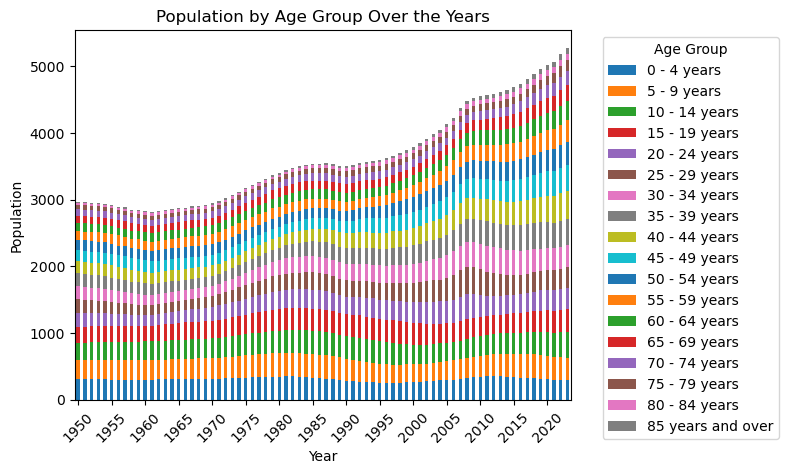

In [16]:
age_group_dtype = pd.CategoricalDtype(categories=selected_age_groups, ordered=True)

filtered_by_sex_df_copy = filtered_by_sex_df.copy()

filtered_by_sex_df_copy['Age Group'] = filtered_by_sex_df_copy['Age Group'].astype(age_group_dtype)

grouped_df = filtered_by_sex_df_copy.groupby(['Year', 'Age Group'])['VALUE'].sum().reset_index()

pivot_df = grouped_df.pivot(index='Year', columns='Age Group', values='VALUE')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population by Age Group Over the Years')
plt.legend(title='Age Group')

years = pivot_df.index
plt.xticks(range(0, len(years), 5), years[::5], rotation=45)

plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### 2.2. Population pyramids for selected years

In [17]:
def plot_population_pyramid(df, years):
    male_colors = ['green', 'blue', 'red']
    female_colors = ['lightgreen', 'lightblue', 'pink']

    fig, ax1 = plt.subplots(figsize=(10, 6))

    for i, year in enumerate(years):
        male_data = df[((df['Year'] == year) & 
                        df['Age Group'].isin(selected_age_groups)) & 
                       (df['Sex'] == 'Male')].copy()
        female_data = df[((df['Year'] == year) & 
                          df['Age Group'].isin(selected_age_groups)) & 
                         (df['Sex'] == 'Female')].copy()

        ax1.barh(female_data['Age Group'], female_data['VALUE'], color=female_colors[i], label=f'Female ({year})')
        ax1.barh(male_data['Age Group'], -male_data['VALUE'], color=male_colors[i], label=f'Male ({year})')

    ax1.set_xlabel('Population (in Thousands)')
    ax1.set_ylabel('Age Group')

    ax1.axvline(x=0, color='black', linewidth=1)

    plt.title('Population Pyramid of Selected Age Groups')

    plt.legend()
    plt.show()


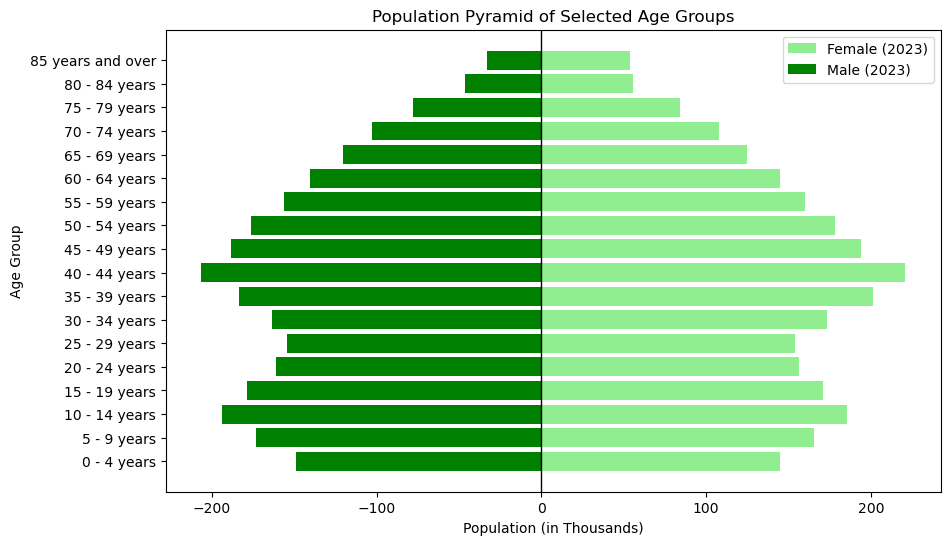

In [18]:
plot_population_pyramid(df, [2023])

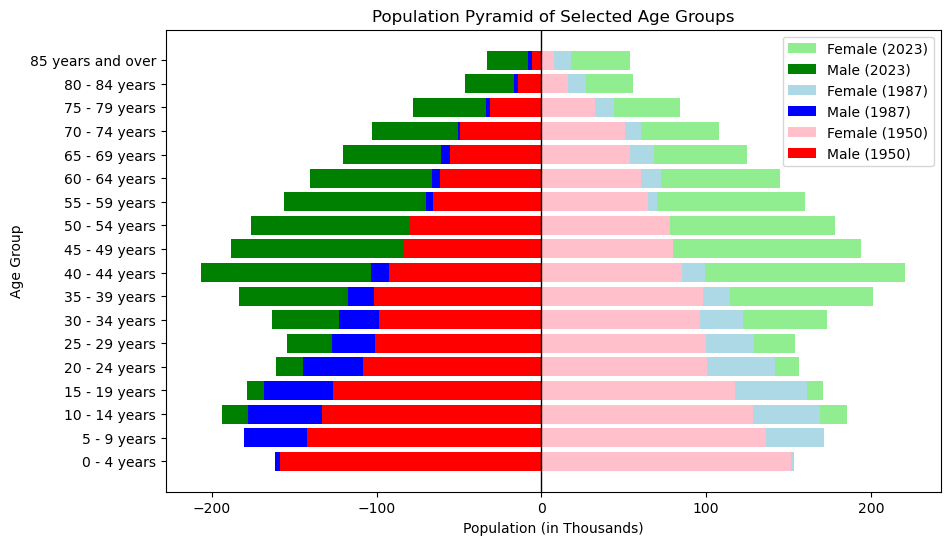

In [19]:
plot_population_pyramid(df, [2023, 1987, 1950])

## Counting the average age

In [20]:
saved_df = df
both_sexes_df = df[(df['Sex'] == 'Both sexes')].copy()
both_sexes_df.drop('Sex', axis=1, inplace=True)
both_sexes_df.head(20)

,Year,Age Group,VALUE
1,1950,0 - 4 years,310.2
3,1950,5 - 9 years,278.9
4,1950,10 - 14 years,262.1
5,1950,15 - 19 years,244.0
6,1950,20 - 24 years,208.6
7,1950,25 - 29 years,201.1
8,1950,30 - 34 years,194.8
9,1950,35 - 39 years,199.8
10,1950,40 - 44 years,177.9
11,1950,45 - 49 years,163.8


In [21]:
both_sexes_df['midpoint'] = both_sexes_df['Age Group'].apply(lambda age_group: int(age_group.split('-')[0]) + 2 if age_group != '85 years and over' else 92.5)
both_sexes_df.head(20)

,Year,Age Group,VALUE,midpoint
1,1950,0 - 4 years,310.2,2.0
3,1950,5 - 9 years,278.9,7.0
4,1950,10 - 14 years,262.1,12.0
5,1950,15 - 19 years,244.0,17.0
6,1950,20 - 24 years,208.6,22.0
7,1950,25 - 29 years,201.1,27.0
8,1950,30 - 34 years,194.8,32.0
9,1950,35 - 39 years,199.8,37.0
10,1950,40 - 44 years,177.9,42.0
11,1950,45 - 49 years,163.8,47.0


In [22]:
def calculate_mean_age(both_sexes_df):
    result_df = both_sexes_df.copy()
    result_df["result"] = result_df["VALUE"] * result_df["midpoint"]
    
    sum_result = result_df.groupby("Year")["result"].sum()
    sum_value = result_df.groupby("Year")["VALUE"].sum()
    
    mean_age = sum_result / sum_value
    
    mean_age_df = mean_age.to_frame().reset_index()
    
    mean_age_df.columns = ["Year", "Mean Age"]
    
    return mean_age_df

In [23]:
calculated_mean_age_df = calculate_mean_age(both_sexes_df)
print(calculated_mean_age_df)

    Year   Mean Age
0   1950  32.026659
1   1951  32.042272
2   1952  32.081615
3   1953  32.119278
4   1954  32.157776
..   ...        ...
69  2019  37.590915
70  2020  37.849099
71  2021  38.153221
72  2022  38.457243
73  2023  38.685389

[74 rows x 2 columns]


In [24]:
def visualize_mean_age(calculated_mean_age_df):
    sns.set_style("whitegrid")
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=calculated_mean_age_df, x="Year", y="Mean Age")
    
    plt.xlabel("Year")
    plt.ylabel("Mean Age")
    plt.title("Mean Age for Each Year")
    
    plt.show()

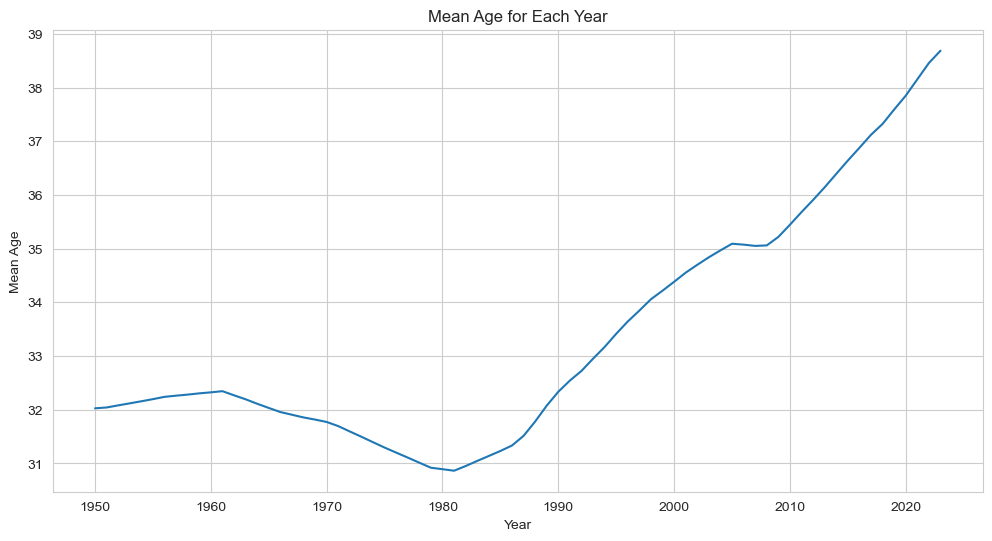

In [25]:
visualize_mean_age(calculated_mean_age_df)

## Prediction of mean age in 2024-2029 using data for previous years

In [26]:
model = LinearRegression()

X = calculated_mean_age_df[['Year']]
y = calculated_mean_age_df['Mean Age']

model.fit(X, y)

future_years = np.arange(2024, 2030).reshape(-1, 1)

future_years_df = pd.DataFrame({'Year': future_years.flatten()})
future_years_df.columns = X.columns

predicted_mean_age = model.predict(future_years_df)

predicted_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Mean Age': predicted_mean_age})
print(predicted_df)

   Year  Predicted Mean Age
0  2024           36.510566
1  2025           36.594465
2  2026           36.678363
3  2027           36.762262
4  2028           36.846161
5  2029           36.930060


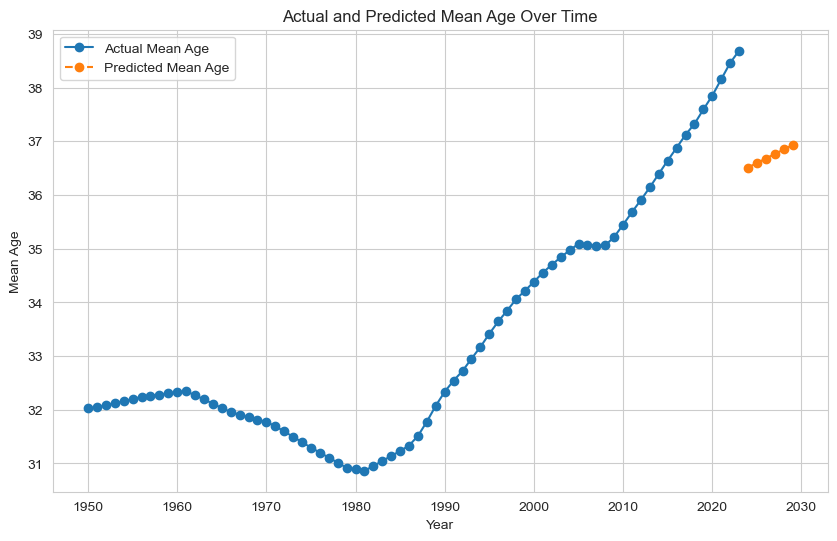

In [32]:
merged_df = pd.merge(calculated_mean_age_df, predicted_df, on='Year', how='outer')

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Year'], merged_df['Mean Age'], label='Actual Mean Age', marker='o')
plt.plot(merged_df['Year'], merged_df['Predicted Mean Age'], label='Predicted Mean Age', linestyle='--', marker='o')
plt.xlabel('Year')
plt.ylabel('Mean Age')
plt.title('Actual and Predicted Mean Age Over Time')
plt.legend()
plt.show()

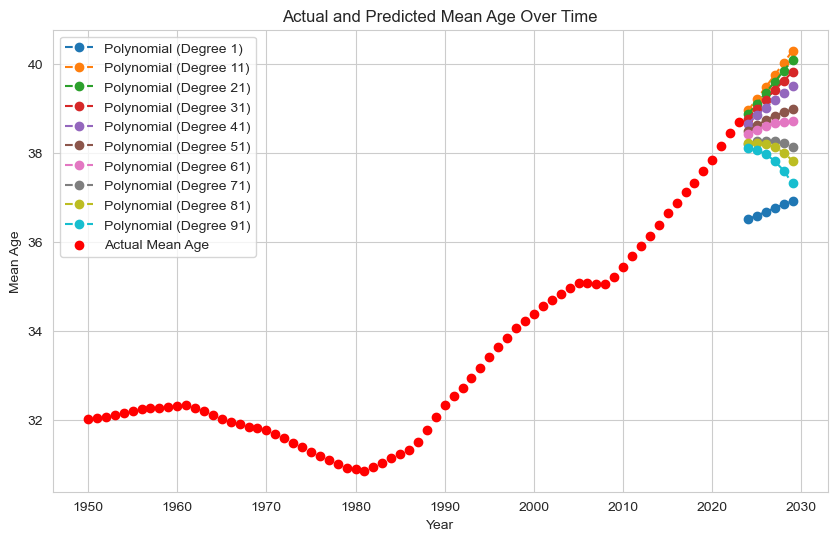

In [35]:
def plot_predictions_with_degrees(start_degree, end_degree, step, calculated_mean_age_df, include_linear_regression=False):
    model_linear = LinearRegression()
    X = calculated_mean_age_df[['Year']]
    y = calculated_mean_age_df['Mean Age']
    model_linear.fit(X, y)

    future_years = np.arange(2024, 2030).reshape(-1, 1)
    future_years_df = pd.DataFrame({'Year': future_years.flatten()})

    future_years_df.columns = X.columns
    predicted_mean_age_linear = model_linear.predict(future_years_df)
    predicted_df_linear = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Mean Age (Linear)': predicted_mean_age_linear})

    plt.figure(figsize=(10, 6))

    if include_linear_regression:
        plt.plot(predicted_df_linear['Year'], predicted_df_linear['Predicted Mean Age (Linear)'], label='Linear Regression', linestyle='--', marker='o')

    for degree in range(start_degree, end_degree + 1, step):
        model_poly = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())
        model_poly.fit(X, y)
        predicted_mean_age_poly = model_poly.predict(future_years_df)
        plt.plot(future_years_df['Year'], predicted_mean_age_poly, label=f'Polynomial (Degree {degree})', linestyle='--', marker='o')

    plt.scatter(calculated_mean_age_df['Year'], calculated_mean_age_df['Mean Age'], label='Actual Mean Age', color='red')

    plt.xlabel('Year')
    plt.ylabel('Mean Age')
    plt.title('Actual and Predicted Mean Age Over Time')
    plt.legend()
    plt.show()

plot_predictions_with_degrees(1, 91, 10, calculated_mean_age_df, include_linear_regression=False)


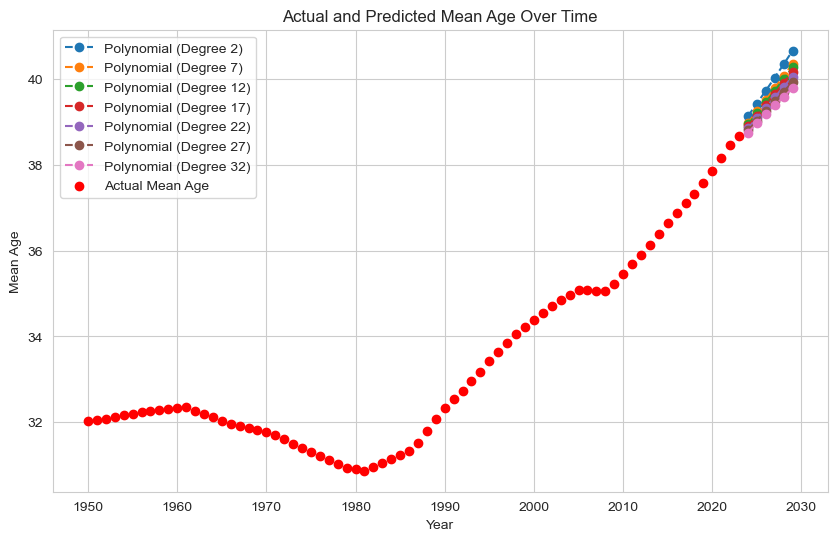

In [36]:
plot_predictions_with_degrees(2, 32, 5, calculated_mean_age_df)

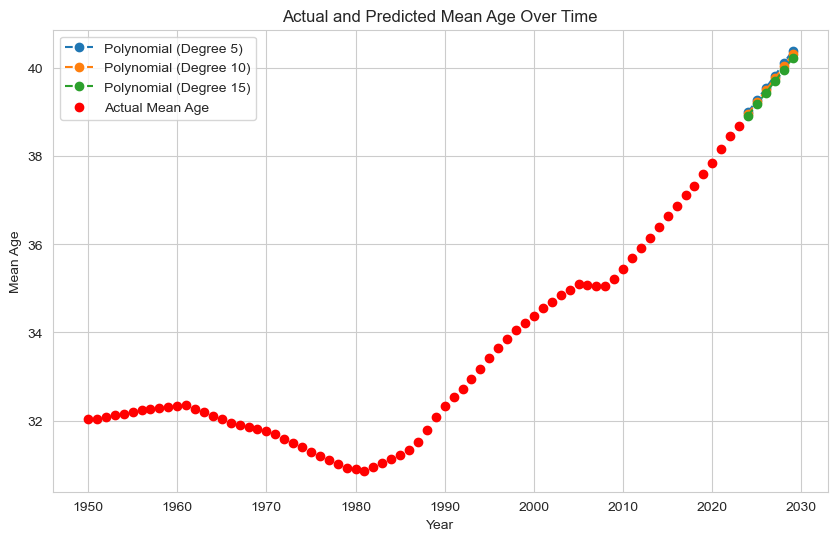

In [37]:
plot_predictions_with_degrees(5, 15, 5, calculated_mean_age_df)

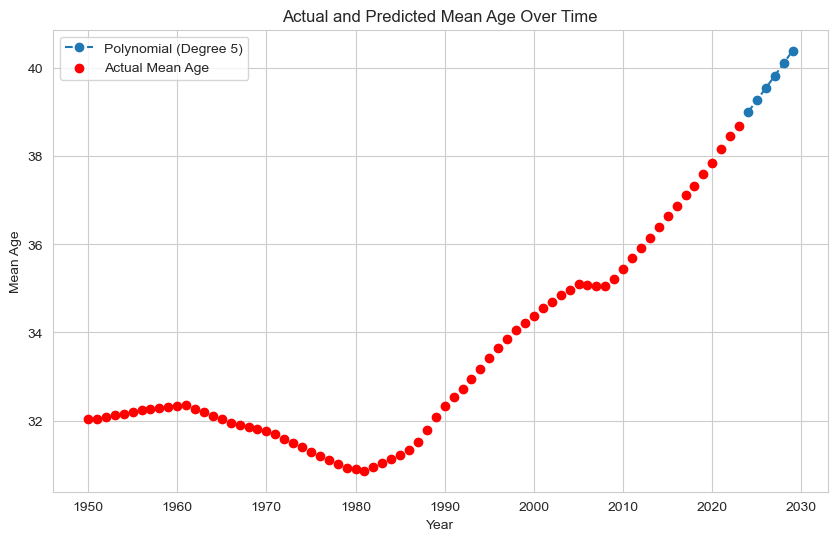

In [54]:
plot_predictions_with_degrees(5, 5, 2, calculated_mean_age_df)

## Using RandomizedSearchCV to find the best degree

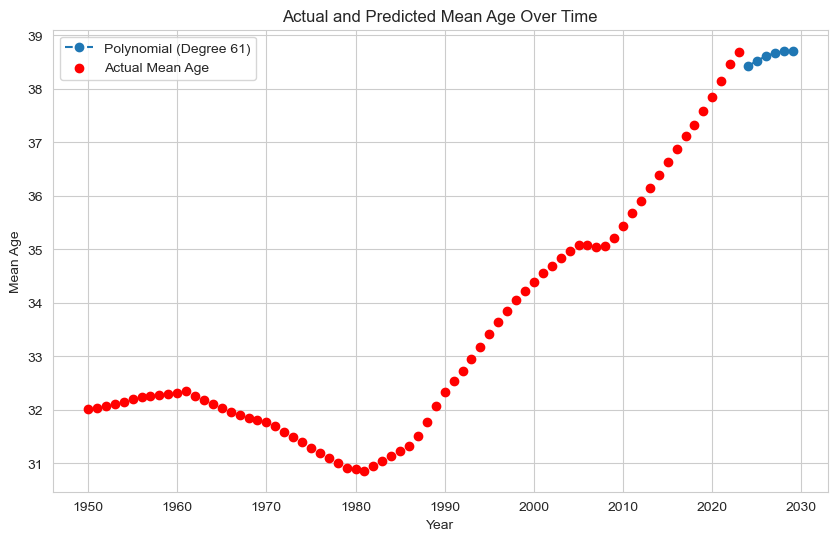

In [38]:
def plot_predictions_with_best_degree(best_degree, calculated_mean_age_df, include_linear_regression=False):
    model_linear = LinearRegression()
    X = calculated_mean_age_df[['Year']]
    y = calculated_mean_age_df['Mean Age']
    model_linear.fit(X, y)

    future_years = np.arange(2024, 2030).reshape(-1, 1)
    future_years_df = pd.DataFrame({'Year': future_years.flatten()})

    future_years_df.columns = X.columns
    predicted_mean_age_linear = model_linear.predict(future_years_df)
    predicted_df_linear = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Mean Age (Linear)': predicted_mean_age_linear})

    plt.figure(figsize=(10, 6))

    if include_linear_regression:
        plt.plot(predicted_df_linear['Year'], predicted_df_linear['Predicted Mean Age (Linear)'], label='Linear Regression', linestyle='--', marker='o')

    model_poly = make_pipeline(PolynomialFeatures(degree=best_degree, include_bias=False), LinearRegression())
    model_poly.fit(X, y)
    predicted_mean_age_poly = model_poly.predict(future_years_df)
    plt.plot(future_years_df['Year'], predicted_mean_age_poly, label=f'Polynomial (Degree {best_degree})', linestyle='--', marker='o')

    plt.scatter(calculated_mean_age_df['Year'], calculated_mean_age_df['Mean Age'], label='Actual Mean Age', color='red')

    plt.xlabel('Year')
    plt.ylabel('Mean Age')
    plt.title('Actual and Predicted Mean Age Over Time')
    plt.legend()
    plt.show()

def find_best_degree_randomized_search(X, y):
    param_dist = {'polynomialfeatures__degree': randint(1, 92)}

    model_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

    random_search = RandomizedSearchCV(model_poly, param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X, y)

    best_degree = random_search.best_params_['polynomialfeatures__degree']

    return best_degree

X = calculated_mean_age_df[['Year']]
y = calculated_mean_age_df['Mean Age']

best_degree = find_best_degree_randomized_search(X, y)
plot_predictions_with_best_degree(best_degree, calculated_mean_age_df, include_linear_regression=False)


## Using GridSearchCV to find the best degree

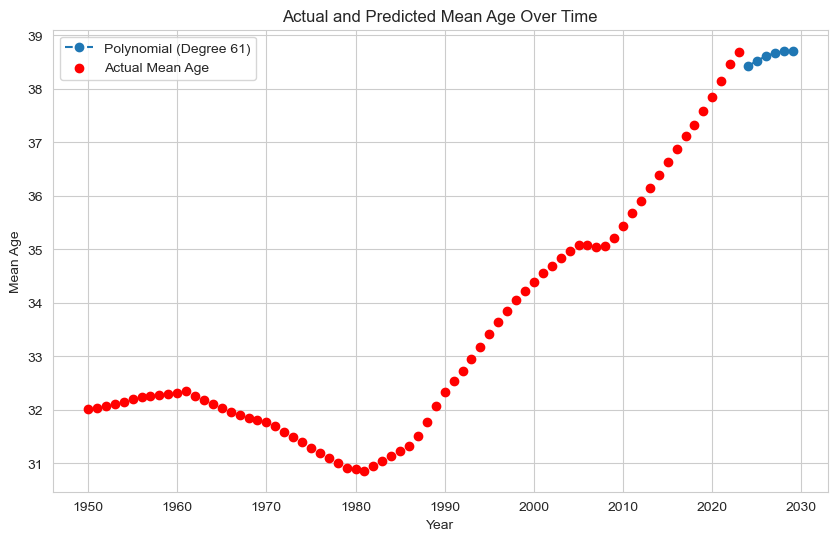

In [39]:
def plot_predictions_with_best_degree(best_degree, calculated_mean_age_df, include_linear_regression=False):
    model_linear = LinearRegression()
    X = calculated_mean_age_df[['Year']]
    y = calculated_mean_age_df['Mean Age']
    model_linear.fit(X, y)

    future_years = np.arange(2024, 2030).reshape(-1, 1)
    future_years_df = pd.DataFrame({'Year': future_years.flatten()})

    future_years_df.columns = X.columns
    predicted_mean_age_linear = model_linear.predict(future_years_df)
    predicted_df_linear = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Mean Age (Linear)': predicted_mean_age_linear})

    plt.figure(figsize=(10, 6))

    if include_linear_regression:
        plt.plot(predicted_df_linear['Year'], predicted_df_linear['Predicted Mean Age (Linear)'], label='Linear Regression', linestyle='--', marker='o')

    model_poly = make_pipeline(PolynomialFeatures(degree=best_degree, include_bias=False), LinearRegression())
    model_poly.fit(X, y)
    predicted_mean_age_poly = model_poly.predict(future_years_df)
    plt.plot(future_years_df['Year'], predicted_mean_age_poly, label=f'Polynomial (Degree {best_degree})', linestyle='--', marker='o')

    plt.scatter(calculated_mean_age_df['Year'], calculated_mean_age_df['Mean Age'], label='Actual Mean Age', color='red')

    plt.xlabel('Year')
    plt.ylabel('Mean Age')
    plt.title('Actual and Predicted Mean Age Over Time')
    plt.legend()
    plt.show()

def find_best_degree_grid_search(X, y):
    param_grid = {'polynomialfeatures__degree': range(1, 92, 10)}

    model_poly = make_pipeline(PolynomialFeatures(include_bias=False), LinearRegression())

    grid_search = GridSearchCV(model_poly, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X, y)

    best_degree = grid_search.best_params_['polynomialfeatures__degree']

    return best_degree

X = calculated_mean_age_df[['Year']]
y = calculated_mean_age_df['Mean Age']

best_degree = find_best_degree_grid_search(X, y)
plot_predictions_with_best_degree(best_degree, calculated_mean_age_df, include_linear_regression=False)


## Clustering of baby boom years

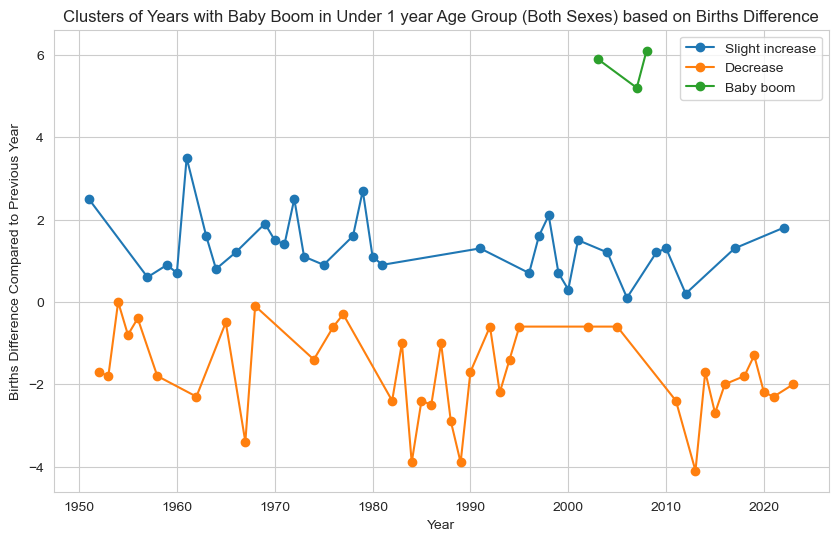

In [40]:
df = pd.read_csv('main_dataset.csv')
baby_boom_data = df.loc[(df['Age Group'] == 'Under 1 year') & (df['Sex'] == 'Both sexes')].copy()

baby_boom_data['Births_Difference'] = baby_boom_data['VALUE'].diff()

baby_boom_data.dropna(subset=['Births_Difference'], inplace=True)

baby_boom_threshold = 4
slight_increase_threshold = 0

baby_boom_data['Cluster_Label'] = 'Slight increase'
baby_boom_data.loc[baby_boom_data['Births_Difference'] >= baby_boom_threshold, 'Cluster_Label'] = 'Baby boom'
baby_boom_data.loc[baby_boom_data['Births_Difference'] <= -slight_increase_threshold, 'Cluster_Label'] = 'Decrease'

plt.figure(figsize=(10, 6))
for cluster_label in baby_boom_data['Cluster_Label'].unique():
    cluster_subset = baby_boom_data[baby_boom_data['Cluster_Label'] == cluster_label]
    plt.plot(cluster_subset['Year'], cluster_subset['Births_Difference'], marker='o', label=cluster_label, linestyle='-')

plt.title('Clusters of Years with Baby Boom in Under 1 year Age Group (Both Sexes) based on Births Difference')
plt.xlabel('Year')
plt.ylabel('Births Difference Compared to Previous Year')
plt.legend()
plt.grid(True)
plt.show()


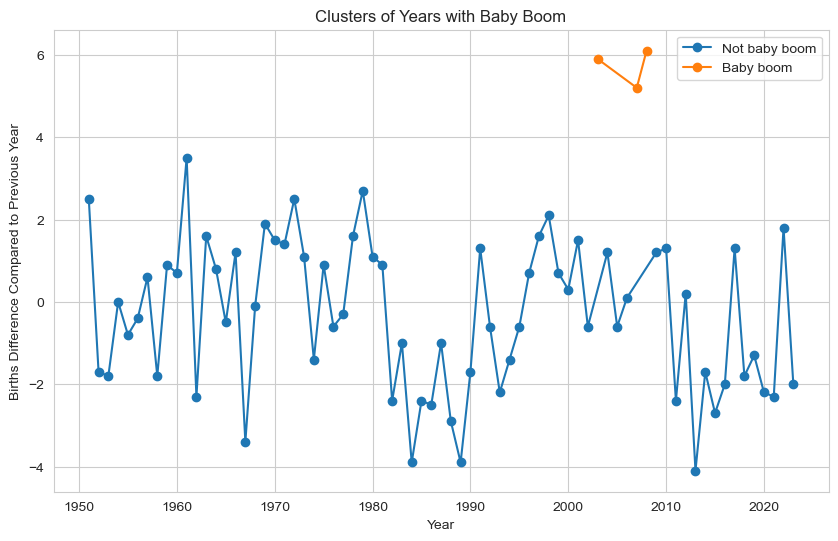

In [41]:
dbscan = DBSCAN(eps=1, min_samples=3)
baby_boom_data['Cluster'] = dbscan.fit_predict(baby_boom_data[['Births_Difference']].values.reshape(-1, 1))

baby_boom_data['Cluster_Label'] = 'Not baby boom'
baby_boom_data.loc[baby_boom_data['Cluster'] == 1, 'Cluster_Label'] = 'Baby boom'

plt.figure(figsize=(10, 6))
for cluster_label in baby_boom_data['Cluster_Label'].unique():
    cluster_subset = baby_boom_data[baby_boom_data['Cluster_Label'] == cluster_label]
    plt.plot(cluster_subset['Year'], cluster_subset['Births_Difference'], marker='o', label=f'{cluster_label}', linestyle='-')

plt.title(f'Clusters of Years with Baby Boom')
plt.xlabel('Year')
plt.ylabel('Births Difference Compared to Previous Year')
plt.legend()
plt.grid(True)
plt.show()

## Calculation of population of each age

In [42]:
prediction_year = 2023

year_data = both_sexes_df[both_sexes_df['Year'] == prediction_year]

predictions_df = pd.DataFrame(columns=['Age', 'Predicted_VALUE'])

X = year_data['midpoint'].values.reshape(-1, 1)
y = year_data['VALUE'].values

degree = 7

poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

ages_to_predict = np.arange(0, 91).reshape(-1, 1)
X_to_predict_poly = poly_features.transform(ages_to_predict)
predicted_values = model.predict(X_to_predict_poly)

predicted_values_scaled = 0.2 * predicted_values

predictions_df['Age'] = np.arange(0,91)
predictions_df['Predicted_VALUE'] = np.clip(predicted_values_scaled, a_min=0, a_max=None)

print(predictions_df)

    Age  Predicted_VALUE
0     0        37.826733
1     1        48.540942
2     2        56.874448
3     3        63.183824
4     4        67.789040
..  ...              ...
86   86        16.472671
87   87        15.458009
88   88        14.728976
89   89        14.358046
90   90        14.430134

[91 rows x 2 columns]


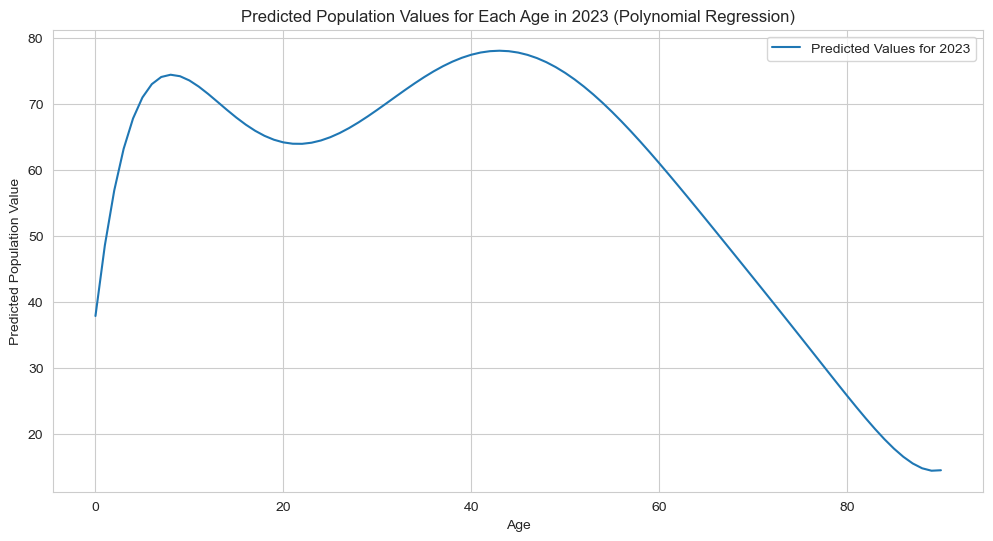

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(predictions_df['Age'], predictions_df['Predicted_VALUE'], label=f'Predicted Values for {prediction_year}')

plt.xlabel('Age')
plt.ylabel('Predicted Population Value')
plt.title(f'Predicted Population Values for Each Age in {prediction_year} (Polynomial Regression)')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
age_ranges = [(0, 4), (5, 9), (10, 14), (15, 19), (20, 24), (25, 29), (30, 34), (35, 39), (40, 44), (45, 49), (50, 54), (55, 59), (60, 64), (65, 69), (70, 74), (75, 79), (80, 84), (85, 100)]

dfs_to_concat = []

for age_range in age_ranges:
    start_age, end_age = age_range
    age_group = f'{start_age} - {end_age} years'
    midpoint = (start_age + end_age) / 2
    predicted_value = predictions_df.loc[(predictions_df['Age'] >= start_age) & (predictions_df['Age'] <= end_age), 'Predicted_VALUE'].sum()

    dataframe = pd.DataFrame({
        'Age Group': [age_group],
        'VALUE': [predicted_value],
        'midpoint': [midpoint]
    })

    dfs_to_concat.append(dataframe)

formatted_predictions_df = pd.concat(dfs_to_concat, ignore_index=True)

print(formatted_predictions_df)

         Age Group       VALUE  midpoint
0      0 - 4 years  274.214987       2.0
1      5 - 9 years  366.683334       7.0
2    10 - 14 years  357.077959      12.0
3    15 - 19 years  330.421543      17.0
4    20 - 24 years  320.635176      22.0
5    25 - 29 years  332.184059      27.0
6    30 - 34 years  355.654175      32.0
7    35 - 39 years  378.138570      37.0
8    40 - 44 years  389.311867      42.0
9    45 - 49 years  384.071645      47.0
10   50 - 54 years  362.625317      52.0
11   55 - 59 years  328.901145      57.0
12   60 - 64 years  288.162005      62.0
13   65 - 69 years  244.700558      67.0
14   70 - 74 years  200.494435      72.0
15   75 - 79 years  155.700088      77.0
16   80 - 84 years  111.863922      82.0
17  85 - 100 years   93.159483      92.5


In [45]:
both_sexes_df[both_sexes_df['Year'] == prediction_year]

,Year,Age Group,VALUE,midpoint
4381,2023,0 - 4 years,293.8,2.0
4383,2023,5 - 9 years,338.6,7.0
4384,2023,10 - 14 years,379.2,12.0
4385,2023,15 - 19 years,349.5,17.0
4386,2023,20 - 24 years,317.8,22.0
4387,2023,25 - 29 years,308.5,27.0
4388,2023,30 - 34 years,337.0,32.0
4389,2023,35 - 39 years,384.5,37.0
4390,2023,40 - 44 years,427.7,42.0
4391,2023,45 - 49 years,382.7,47.0


In [46]:
df = both_sexes_df
df

,Year,Age Group,VALUE,midpoint
1,1950,0 - 4 years,310.2,2.0
3,1950,5 - 9 years,278.9,7.0
4,1950,10 - 14 years,262.1,12.0
5,1950,15 - 19 years,244.0,17.0
6,1950,20 - 24 years,208.6,22.0
...,...,...,...,...
4395,2023,65 - 69 years,244.8,67.0
4396,2023,70 - 74 years,210.5,72.0
4397,2023,75 - 79 years,162.1,77.0
4398,2023,80 - 84 years,101.8,82.0


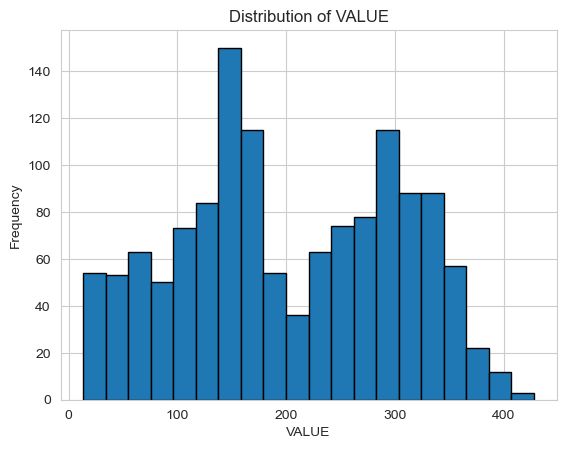

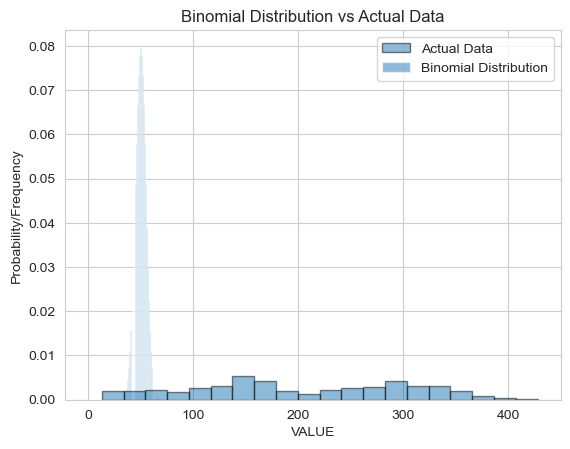

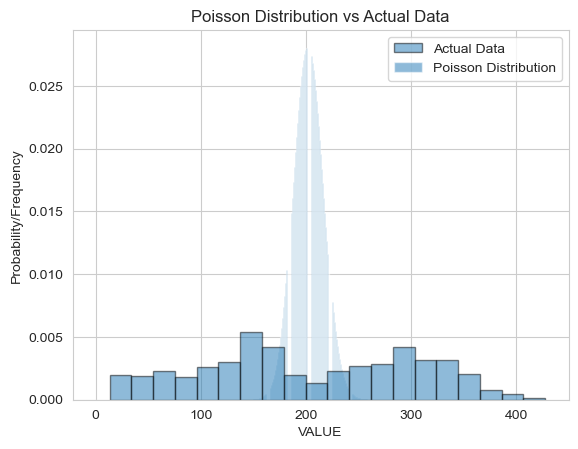

In [47]:
plt.hist(df['VALUE'], bins=20, edgecolor='black')
plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()

n = 100
p = 0.5

binomial_dist = binom(n, p)
x = np.arange(0, max(df['VALUE']) + 1)
binomial_pmf = binomial_dist.pmf(x)

plt.bar(x, binomial_pmf, label='Binomial Distribution', alpha=0.5)
plt.hist(df['VALUE'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Binomial Distribution vs Actual Data')
plt.xlabel('VALUE')
plt.ylabel('Probability/Frequency')
plt.legend()
plt.show()

lambda_est = df['VALUE'].mean()

poisson_pmf = poisson.pmf(x, lambda_est)

plt.bar(x, poisson_pmf, label='Poisson Distribution', alpha=0.5)
plt.hist(df['VALUE'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Poisson Distribution vs Actual Data')
plt.xlabel('VALUE')
plt.ylabel('Probability/Frequency')
plt.legend()
plt.show()


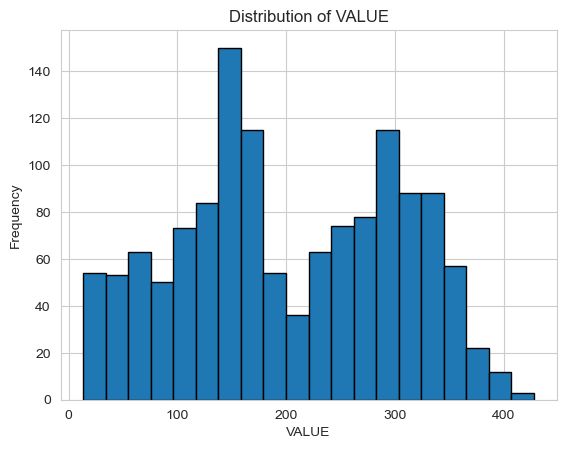

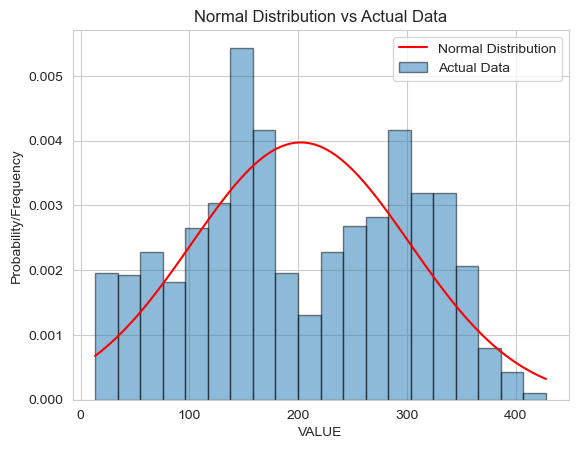

Shapiro-Wilk Test Statistic: 0.9636005759239197, p-value: 9.15945364086093e-18


In [48]:
plt.hist(df['VALUE'], bins=20, edgecolor='black')
plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')
plt.show()

mu, sigma = df['VALUE'].mean(), df['VALUE'].std()

x = np.linspace(df['VALUE'].min(), df['VALUE'].max(), 100)
normal_pdf = norm.pdf(x, mu, sigma)

plt.plot(x, normal_pdf, label='Normal Distribution', color='red')
plt.hist(df['VALUE'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Normal Distribution vs Actual Data')
plt.xlabel('VALUE')
plt.ylabel('Probability/Frequency')
plt.legend()
plt.show()

stat, p_value = shapiro(df['VALUE'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")


In [49]:
calculated_mean_age_df

,Year,Mean Age
0,1950,32.026659
1,1951,32.042272
2,1952,32.081615
3,1953,32.119278
4,1954,32.157776
...,...,...
69,2019,37.590915
70,2020,37.849099
71,2021,38.153221
72,2022,38.457243


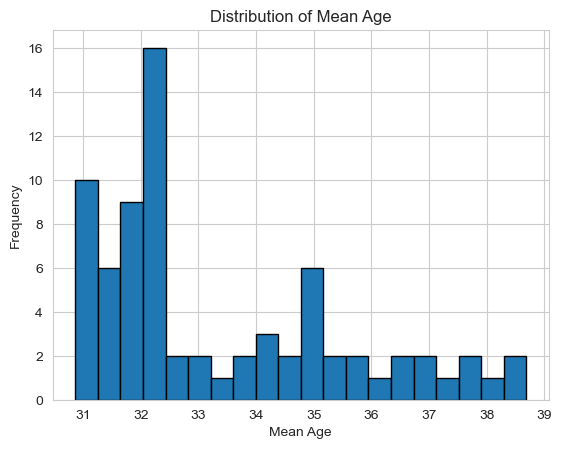

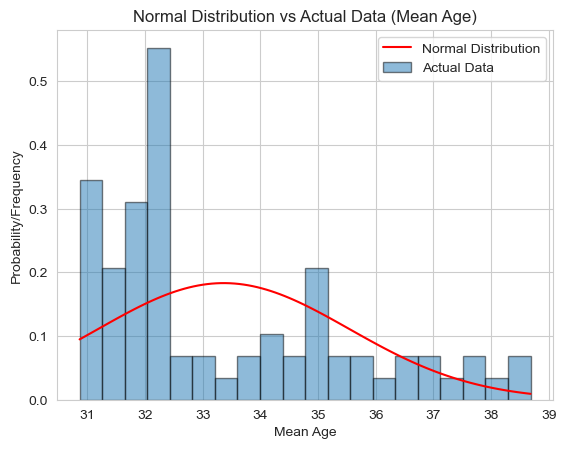

Shapiro-Wilk Test Statistic: 0.8763731122016907, p-value: 3.009251940966351e-06


In [50]:
plt.hist(calculated_mean_age_df['Mean Age'], bins=20, edgecolor='black')
plt.title('Distribution of Mean Age')
plt.xlabel('Mean Age')
plt.ylabel('Frequency')
plt.show()

mu, sigma = calculated_mean_age_df['Mean Age'].mean(), calculated_mean_age_df['Mean Age'].std()

x = np.linspace(calculated_mean_age_df['Mean Age'].min(), calculated_mean_age_df['Mean Age'].max(), 100)
normal_pdf = norm.pdf(x, mu, sigma)

plt.plot(x, normal_pdf, label='Normal Distribution', color='red')
plt.hist(calculated_mean_age_df['Mean Age'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Normal Distribution vs Actual Data (Mean Age)')
plt.xlabel('Mean Age')
plt.ylabel('Probability/Frequency')
plt.legend()
plt.show()

stat, p_value = shapiro(calculated_mean_age_df['Mean Age'])
print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")


In [51]:
baby_boom_data

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE,Births_Difference,Cluster_Label,Cluster
81,Population Estimates (Persons in April),1951,Under 1 year,Both sexes,Thousand,63.6,2.5,Not baby boom,0
162,Population Estimates (Persons in April),1952,Under 1 year,Both sexes,Thousand,61.9,-1.7,Not baby boom,0
243,Population Estimates (Persons in April),1953,Under 1 year,Both sexes,Thousand,60.1,-1.8,Not baby boom,0
324,Population Estimates (Persons in April),1954,Under 1 year,Both sexes,Thousand,60.1,0.0,Not baby boom,0
405,Population Estimates (Persons in April),1955,Under 1 year,Both sexes,Thousand,59.3,-0.8,Not baby boom,0
...,...,...,...,...,...,...,...,...,...
5589,Population Estimates (Persons in April),2019,Under 1 year,Both sexes,Thousand,60.4,-1.3,Not baby boom,0
5670,Population Estimates (Persons in April),2020,Under 1 year,Both sexes,Thousand,58.2,-2.2,Not baby boom,0
5751,Population Estimates (Persons in April),2021,Under 1 year,Both sexes,Thousand,55.9,-2.3,Not baby boom,0
5832,Population Estimates (Persons in April),2022,Under 1 year,Both sexes,Thousand,57.7,1.8,Not baby boom,0


In [52]:
baby_boom_df = baby_boom_data[['Year', 'VALUE', 'Births_Difference']]
baby_boom_df

,Year,VALUE,Births_Difference
81,1951,63.6,2.5
162,1952,61.9,-1.7
243,1953,60.1,-1.8
324,1954,60.1,0.0
405,1955,59.3,-0.8
...,...,...,...
5589,2019,60.4,-1.3
5670,2020,58.2,-2.2
5751,2021,55.9,-2.3
5832,2022,57.7,1.8


In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(baby_boom_df['VALUE'], bins=20, edgecolor='black')
plt.title('Distribution of VALUE')
plt.xlabel('VALUE')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(baby_boom_df['Births_Difference'], bins=20, edgecolor='black')
plt.title('Distribution of Births_Difference')
plt.xlabel('Births_Difference')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

mu_value, sigma_value = baby_boom_df['VALUE'].mean(), baby_boom_df['VALUE'].std()
mu_difference, sigma_difference = baby_boom_df['Births_Difference'].mean(), baby_boom_df['Births_Difference'].std()

x_value = np.linspace(baby_boom_df['VALUE'].min(), baby_boom_df['VALUE'].max(), 100)
normal_pdf_value = norm.pdf(x_value, mu_value, sigma_value)

x_difference = np.linspace(baby_boom_df['Births_Difference'].min(), baby_boom_df['Births_Difference'].max(), 100)
normal_pdf_difference = norm.pdf(x_difference, mu_difference, sigma_difference)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(x_value, normal_pdf_value, label='Normal Distribution', color='red')
plt.hist(baby_boom_df['VALUE'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Normal Distribution vs Actual Data (VALUE)')
plt.xlabel('VALUE')
plt.ylabel('Probability/Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_difference, normal_pdf_difference, label='Normal Distribution', color='red')
plt.hist(baby_boom_df['Births_Difference'], bins=20, density=True, edgecolor='black', label='Actual Data', alpha=0.5)
plt.title('Normal Distribution vs Actual Data (Births_Difference)')
plt.xlabel('Births_Difference')
plt.ylabel('Probability/Frequency')
plt.legend()

plt.tight_layout()
plt.show()

stat_value, p_value_value = shapiro(baby_boom_df['VALUE'])
stat_difference, p_value_difference = shapiro(baby_boom_df['Births_Difference'])
print(f"Shapiro-Wilk Test Statistic (VALUE): {stat_value}, p-value: {p_value_value}")
print(f"Shapiro-Wilk Test Statistic (Births_Difference): {stat_difference}, p-value: {p_value_difference}")
